# Introduction

Taufik Aji Putra <br>
PYTN-KS05-003 <br>
Introduction to Python for Data Science (Studi Independen Kampus Merdeka Batch II) <br>

# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

[Download Here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

--- 
This dataset contains:

Input variables:

**#bank client data**<br>
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**#related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**#other attributes:** <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**#social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Import Library

**Import library yang dibutuhkan**

In [1]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import linear_model, decomposition

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

**Import dataset yang akan digunakan dan menampilkan 5 data awal**

In [2]:
# Tambahkan sep=';' untuk data csv yang akan ditampilkan sebagai dataframe
df = pd.read_csv('./dataset/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Menampilkan 5 data terakhir**

In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**Mengetahui kolom dan tipe data setiap kolom**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Menghapus kolom 'duration'**

Berdasarkan deskripsi dataset, variabel 'duration' memiliki bias yang tinggi dikarenakan jika nilai duration=0 maka sudah pasti target = no, sehingga untuk meningkatkan akurasi proses modelling nanti, kolom 'duration' akan dihapus.

In [5]:
df.drop('duration',inplace=True, axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Menampilkan dimensi (shape) dataset**

In [6]:
df.shape

(41188, 20)

**Menampilkan deskriptif statistik dataset**

In [7]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


---
**Membagi kolom sesuai tipe datanya**

In [8]:
#Variabel Numerik
numerical_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
numerical_columns

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [9]:
#Variabel Kategorik
categorical_columns = list(df.select_dtypes(include=['object']))
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

---

# Data Cleaning

## Missing Values

### Categorical

**Melihat kolom kategorikal**

In [10]:
df[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Mengetahui nilai unik pada categorical columns**

In [11]:
for cat_col in categorical_columns:
    print("Unique Values for: ", cat_col.upper())
    print("Count: ", df[cat_col].nunique())
    print("-"*25)
    print(df[cat_col].unique())
    print('='*50)

Unique Values for:  JOB
Count:  12
-------------------------
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique Values for:  MARITAL
Count:  4
-------------------------
['married' 'single' 'divorced' 'unknown']
Unique Values for:  EDUCATION
Count:  8
-------------------------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique Values for:  DEFAULT
Count:  3
-------------------------
['no' 'unknown' 'yes']
Unique Values for:  HOUSING
Count:  3
-------------------------
['no' 'yes' 'unknown']
Unique Values for:  LOAN
Count:  3
-------------------------
['no' 'yes' 'unknown']
Unique Values for:  CONTACT
Count:  2
-------------------------
['telephone' 'cellular']
Unique Values for:  MONTH
Count:  10
-------------------------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique Values for:  DAY_OF_WEE

---
Terdapat value pada beberapa kolom yakni berupa 'unknown' yang merupakan label missing value pada dataset ini. Akan dilakukan perubahan label 'Unknown' menjadi nan untuk menandai adanya unstandard missing values.

**Mengetahui jumlah "Unknown" pada setiap kolom**

In [12]:
df[df[categorical_columns]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
campaign             0
previous             0
pdays                0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

**Mengganti "Unknown" dengan nan**

In [13]:
df[df[categorical_columns]=="unknown"] = np.nan

---
**Melihat apakah "Unknown" sudah terganti**

- Melihat count pada setiap kolom

In [14]:
df[df[categorical_columns]=='unknown'].count().sort_values(ascending=False)

age               0
job               0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

- Melihat unique value setelah "Unknown" diganti

In [15]:
for cat_col in categorical_columns:
    print("Unique Values for: ", cat_col.upper())
    print("Count: ", df[cat_col].nunique())
    print("-"*25)
    print(df[cat_col].unique())
    print('='*50)

Unique Values for:  JOB
Count:  11
-------------------------
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Unique Values for:  MARITAL
Count:  3
-------------------------
['married' 'single' 'divorced' nan]
Unique Values for:  EDUCATION
Count:  7
-------------------------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Unique Values for:  DEFAULT
Count:  2
-------------------------
['no' nan 'yes']
Unique Values for:  HOUSING
Count:  2
-------------------------
['no' 'yes' nan]
Unique Values for:  LOAN
Count:  2
-------------------------
['no' 'yes' nan]
Unique Values for:  CONTACT
Count:  2
-------------------------
['telephone' 'cellular']
Unique Values for:  MONTH
Count:  10
-------------------------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique Values for:  DAY_OF_WEEK
Count:  5
-------------------------

- Melihat kolom kategorikal setelah "Unknown" diganti

In [16]:
df[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Mengetahui jumlah nan missing values pada kolom kategorik**

In [17]:
df[categorical_columns].isnull().sum()

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

### Numerical

**Melihat kolom numerikal**

In [18]:
df[numerical_columns].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [19]:
df[numerical_columns].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


**Mengetahui nilai unik pada numerical columns**

In [20]:
for num_col in numerical_columns:
    print("Unique Values for: ", num_col.upper())
    print("Count: ", df[num_col].nunique())
    print("-"*25)
    print(df[num_col].unique())
    print('='*50)

Unique Values for:  AGE
Count:  78
-------------------------
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique Values for:  CAMPAIGN
Count:  42
-------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Unique Values for:  PDAYS
Count:  27
-------------------------
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Unique Values for:  PREVIOUS
Count:  8
-------------------------
[0 1 2 3 4 5 6 7]
Unique Values for:  EMP.VAR.RATE
Count:  10
-------------------------
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Unique Values for:  CONS.PRICE.IDX
Count:  26
-------------------------
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.8

**Mengetahui jumlah missing values pada kolom numerik**

In [21]:
df[numerical_columns].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

## Handling Missing Values

**Melihat kembali jumlah missing values pada dataset**

In [22]:
print("Jumlah missing values (Kategorik) = ",df[categorical_columns].isnull().sum().sum())
print("Jumlah missing values (Numerik) = ",df[numerical_columns].isnull().sum().sum())

Jumlah missing values (Kategorik) =  12718
Jumlah missing values (Numerik) =  0


Missing value hanya ada pada variabel kategorik, sehingga akan dilakukan penanganan missing values pada variabel kategorik dengan mengisi data tersebut dengan nilai modusnya.

**Memisahkan data kategorik & numerik**

In [23]:
# categorical data
df_categorical = df[categorical_columns]

# numerical data
df_numerical = df[numerical_columns]

---
**Melakukan instansiasi kelas Imputer untuk mengisi nilai missing value pada data kategorikal**

- Menggunakan SimpleImputer dengan strategy = 'most_frequent'

In [24]:
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

- Melakukan fit data kategorikal ke imputer

In [25]:
imputer_categorical.fit(df_categorical)

SimpleImputer(strategy='most_frequent')

In [26]:
# Transform kembali ke data
df_categorical = imputer_categorical.transform(df_categorical)

---
**Membuat dataframe hasil imputer Transform**

In [27]:
df_categorical = pd.DataFrame(df_categorical,columns=categorical_columns)

In [28]:
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Melakukan concate kolom kategorikal dan numerikal**

In [29]:
df = pd.concat([df_numerical,df_categorical],axis=1)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Mengecek kembali missing values**

In [30]:
print("Jumlah missing values (Kategorik) = ",df[categorical_columns].isnull().sum().sum())
print("Jumlah missing values (Numerik) = ",df[numerical_columns].isnull().sum().sum())

Jumlah missing values (Kategorik) =  0
Jumlah missing values (Numerik) =  0


Sudah tidak ada missing values. Akan dilanjutkan dengan melihat data duplicated.

## Handling Duplicated

**Menghitung total nilai duplicated**

In [31]:
df.duplicated().sum()

2109

**Melihat baris duplicated data**

In [32]:
df[df.duplicated()]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
10,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,blue-collar,married,university.degree,no,no,no,telephone,may,mon,nonexistent,no
11,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,no
16,35,1,999,0,1.1,93.994,-36.4,4.857,5191.0,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,nonexistent,no
31,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,technician,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
104,52,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,divorced,university.degree,no,no,no,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39985,27,2,999,0,-1.7,94.055,-39.8,0.761,4991.6,admin.,single,high.school,no,no,no,cellular,jun,tue,nonexistent,yes
40401,31,2,999,0,-1.7,94.027,-38.3,0.904,4991.6,student,single,university.degree,no,yes,no,cellular,aug,thu,nonexistent,yes
40404,41,1,999,0,-1.7,94.027,-38.3,0.904,4991.6,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,nonexistent,yes
40806,35,1,999,2,-1.1,94.199,-37.5,0.878,4963.6,technician,married,professional.course,no,yes,no,cellular,sep,thu,failure,no


**Melakukan penghapusan duplicated data**

In [33]:
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)

**Mengecek kembali jumlah duplicated data**

In [34]:
df.duplicated().sum()

0

**Melakukan perubahan nama kolom**

In [35]:
df.rename(columns={'y':'deposito',},inplace=True)

**Melakukan reset index**

In [36]:
df = df.reset_index(drop=True)

**Melihat data setelah dilakukan data cleaning**

In [37]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposito
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Melihat nilai deskriptif statistik dataset**

In [38]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39079.000000,39079.000000,39079.000000,39079.000000,39079.000000,39079.000000,39079.000000,39079.000000,39079.000000
mean,40.121114,2.627780,960.529799,0.180046,0.058658,93.576543,-40.509225,3.595010,5165.756289
std,10.475117,2.823201,191.629394,0.504882,1.579010,0.584670,4.649252,1.744511,72.914492
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposito
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39074,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
39075,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
39076,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
39077,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


# Visualization Data 

**Mendefinisikan kembali variabel numerik dan kategorik**

In [40]:
numerical_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df.select_dtypes(include=['object']))

## Categorical

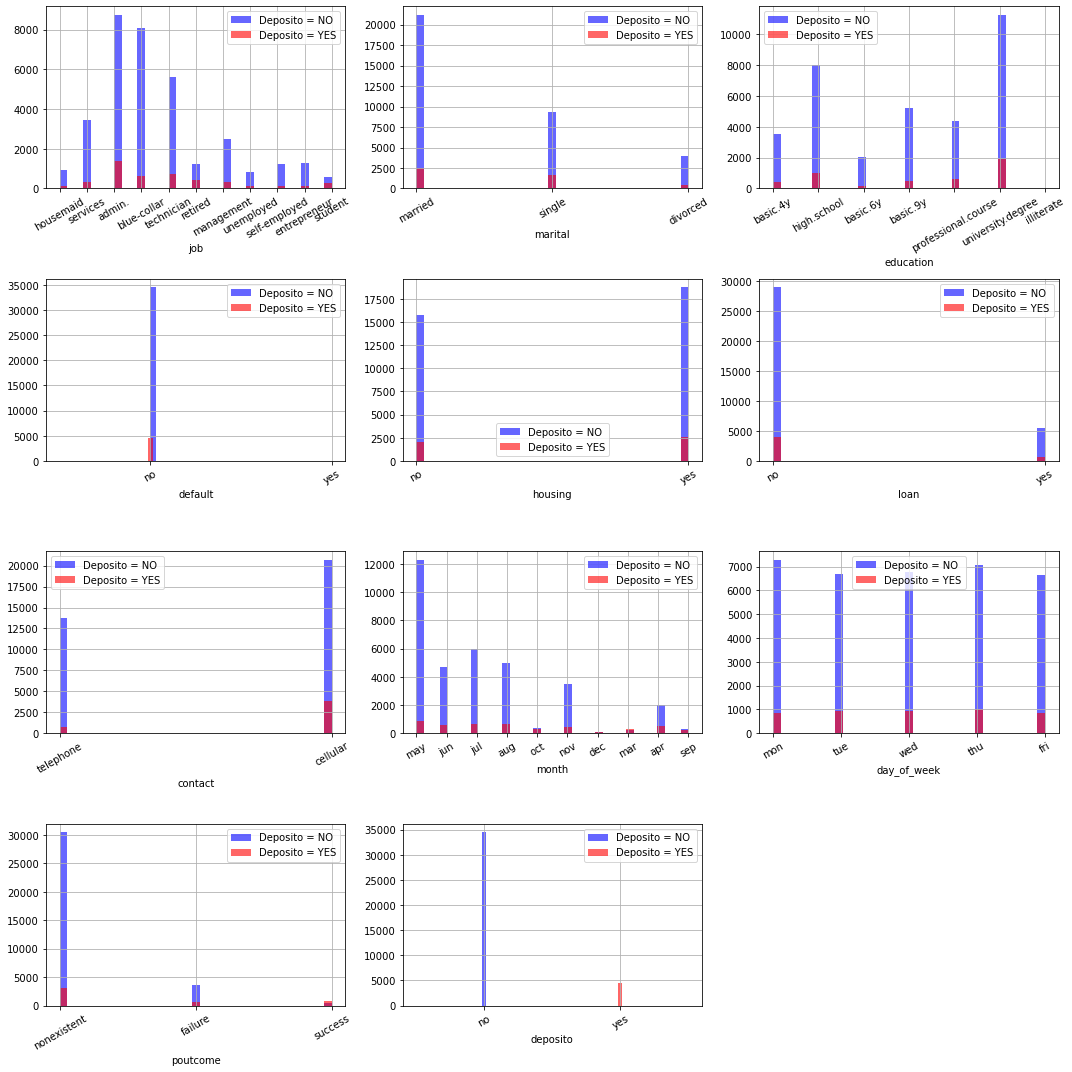

In [41]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    df[df["deposito"] == 'no'][column].hist(bins=35, color='blue', label='Deposito = NO', alpha=0.6)
    df[df["deposito"] == 'yes'][column].hist(bins=35, color='red', label='Deposito = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.tight_layout()
    plt.xticks(rotation=30)

**Melihat nilai unik dan value_count kolom kategorik**

In [42]:
for cat_col in categorical_columns:
    print("Unique Values for: ", cat_col.upper())
    print("Count: ", df[cat_col].nunique())
    print("-"*25)
    print(df[cat_col].value_counts())
    print('='*50)

Unique Values for:  JOB
Count:  11
-------------------------
admin.           10106
blue-collar       8717
technician        6357
services          3767
management        2806
retired           1676
entrepreneur      1402
self-employed     1381
housemaid         1028
unemployed         988
student            851
Name: job, dtype: int64
Unique Values for:  MARITAL
Count:  3
-------------------------
married     23693
single      10938
divorced     4448
Name: marital, dtype: int64
Unique Values for:  EDUCATION
Count:  7
-------------------------
university.degree      13144
high.school             9060
basic.9y                5718
professional.course     4985
basic.4y                3947
basic.6y                2207
illiterate                18
Name: education, dtype: int64
Unique Values for:  DEFAULT
Count:  2
-------------------------
no     39076
yes        3
Name: default, dtype: int64
Unique Values for:  HOUSING
Count:  2
-------------------------
yes    21329
no     17750
Name: hou

In [43]:
df['default'].value_counts()

no     39076
yes        3
Name: default, dtype: int64

Dapat dilihat dari grafik dan dari nilai value_count, bahwa terdapat kolom yang sangat tidak seimbang dan memiliki nilai yang tidak unik, yakni variabel 'default'. Sehingga akan dilakukan penghapusan kolom tersebut.

**Penghapusan kolom 'default'**

In [44]:
df.drop('default',inplace=True, axis=1)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,deposito
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent,no
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,telephone,may,mon,nonexistent,no
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,yes,no,telephone,may,mon,nonexistent,no
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent,no
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,telephone,may,mon,nonexistent,no


## Numerical

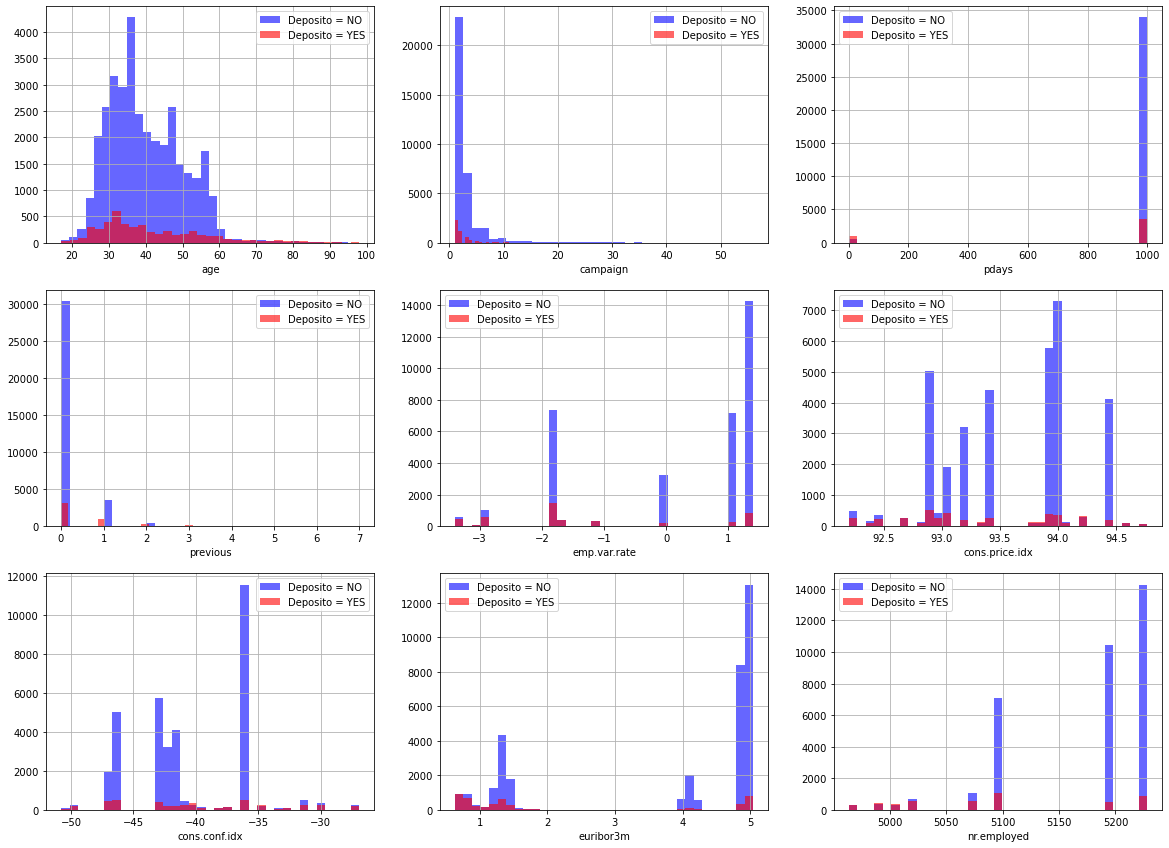

In [45]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    df[df["deposito"] == 'no'][column].hist(bins=35, color='blue', label='Deposito = NO', alpha=0.6)
    df[df["deposito"] == 'yes'][column].hist(bins=35, color='red', label='Deposito = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [46]:
for num_col in numerical_columns:
    print("Unique Values for: ", num_col.upper())
    print("Count: ", df[num_col].nunique())
    print("-"*25)
    print(df[num_col].value_counts())
    print('='*50)

Unique Values for:  AGE
Count:  78
-------------------------
31    1809
32    1746
33    1719
35    1659
36    1653
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
Unique Values for:  CAMPAIGN
Count:  42
-------------------------
1     16155
2     10145
3      5206
4      2621
5      1585
6       972
7       622
8       399
9       282
10      224
11      177
12      125
13       91
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64
Unique Values for:  PDAYS
Count:  27
-------------------------
999    37565
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5  

In [47]:
df['pdays'].value_counts()

999    37565
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

**Penghapusan kolom 'pdays'**

Dapat dilihat dari grafik dan dari nilai value_count, bahwa kolom 'pdays' memiliki value dengan nilai range yang sangat jauh terhadap value lainnya. Hal ini dikarenakan terdapat value '999' yang dikategorikan sebagai customer yang tidak pernah dikontak dari campaign sebelumnya, sehingga tidak bisa dikategorikan terhadap value lainnya. Maka akan dilakukan penghapusan kolom tersebut.

In [48]:
df.drop('pdays',inplace=True, axis=1)
df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,deposito
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,telephone,may,mon,nonexistent,no
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,telephone,may,mon,nonexistent,no
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,yes,no,telephone,may,mon,nonexistent,no
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,telephone,may,mon,nonexistent,no
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,telephone,may,mon,nonexistent,no


## Deposito (Target)

**Melihat value_count pada kolom 'deposito'**

In [49]:
df['deposito'].value_counts()

no     34484
yes     4595
Name: deposito, dtype: int64

**Membuat plot proporsi nilai pada kolom 'deposito'**

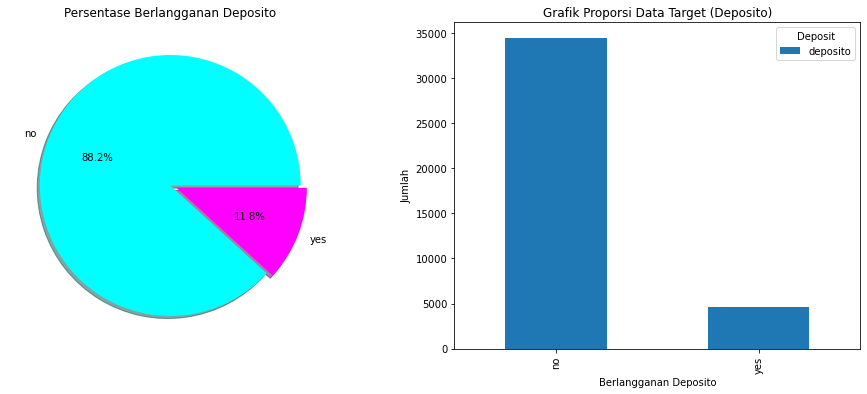

In [50]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "berlangganan deposito"
df['deposito'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('deposito').agg({'deposito':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Grafik Proporsi Data Target (Deposito)')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Deposito')
ax[1].legend(title='Deposit')

# Data Preprocessing

## Encoding (Categorical)

**Mendefinisikan kembali variabel numerik dan kategorik**

In [51]:
numerical_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df.select_dtypes(include=['object']))

**Mengelompokkan data nominal dan ordinal dari variabel kategorik**

In [52]:
nominal_columns = ['job', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]

**One Hot Encoding (Nominal)**

In [53]:
df_ohe = pd.get_dummies(df[nominal_columns], columns=nominal_columns, prefix=nominal_columns)
df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


**Label Encoding (Ordinal)**

In [54]:
df_le = df.loc[:,ordinal_columns]

# instansiasi kelas LabelEncoder
encoder = LabelEncoder()

# label encoding
for ord_col in ordinal_columns:
    df_le[ord_col] = encoder.fit_transform(df_le[ord_col])

# Menampilkan data
df_le.head()

,marital,housing,loan,deposito
0,1,0,0,0
1,1,0,0,0
2,1,1,0,0
3,1,0,0,0
4,1,0,1,0


**Melakukan concate data One Hot Encoding & Label Encoding**

In [55]:
df_categorical_encoded = pd.concat([df_ohe,df_le],axis=1)
df_categorical_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,marital,housing,loan,deposito
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


**Melakukan concate data Categorical Encoded & Numerical**

In [56]:
df = pd.concat([df[numerical_columns],df_categorical_encoded],axis=1)
df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,marital,housing,loan,deposito
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,0,1,0


## Train-test data split

Dataset akan dibagi menjadi 80:20 (80% Training dan 20% Test)

**Mendefinisikan variabel X dan y**

In [57]:
X = df.drop('deposito',axis=1)
y = df['deposito']

**Melakukan train-test split**

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Mengetahui dimensi data Training dan Test**

In [59]:
print("Dimensi X_train = ", X_train.shape)
print("Dimensi y_train = ", y_train.shape)
print("Dimensi X_test = ", X_test.shape)
print("Dimensi y_test = ", y_test.shape)

Dimensi X_train =  (31263, 49)
Dimensi y_train =  (31263,)
Dimensi X_test =  (7816, 49)
Dimensi y_test =  (7816,)


## Normalization Data (Standard Scaler)

In [60]:
# Instansiasi kelas StandardScaler
standard_scaler = StandardScaler()

# fit scaler into train data
standard_scaler.fit(X_train)

# transform data with scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

## Handling Imbalance Data

**Melihat nilai value_counts y_train**

In [61]:
y_train.value_counts()

0    27559
1     3704
Name: deposito, dtype: int64

**Menerapkan SMOTE**

In [62]:
os = SMOTE(random_state = 42)
X_train_smote,y_train_smote = os.fit_resample(X_train,y_train)
X_train_smote = pd.DataFrame(data = X_train_smote,columns=X.columns)
y_train_smote = pd.DataFrame(data = y_train_smote)

In [63]:
y_train_smote.value_counts()

deposito
0           27559
1           27559
dtype: int64

# Modelling

**Mendefinisikan program print_score**

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**Mendefinisikan program cm_heatmap**

In [65]:
def cm_heatmap(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix (Train): \n {sns.heatmap(cm, annot=True)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix (Test): \n {sns.heatmap(cm, annot=True)}\n")

## Logistic Regression

### Default

**Melihat Classification Report (LogisticRegression)**

In [66]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.50%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.904789     0.664839  0.894988      0.784814      0.876360
recall         0.984470     0.229212  0.894988      0.606841      0.894988
f1-score       0.942949     0.340895  0.894988      0.641922      0.871618
support    27559.000000  3704.000000  0.894988  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[27131   428]
 [ 2855   849]]

Test Result:
Accuracy Score: 89.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.908982    0.647059  0.898158     0.778020      0.879123
recall        0.983538    0.234568  0.898158     0.609053      0.898158
f1-score      0.944791    0.344316  0.898158     0.644554      0.876339
support    6925.000000

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


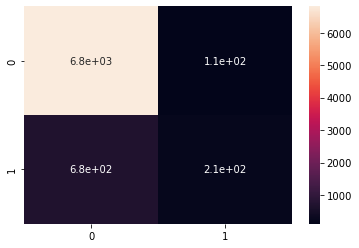

In [67]:
print(cm_heatmap(lr_clf, X_train, y_train, X_test, y_test, train=False))

**Menghitung koefisien model logistic regression**

In [68]:
print(lr_clf.intercept_, lr_clf.coef_)

[-2.42851735] [[-1.99503680e-02 -1.47607969e-01  1.69746054e-02 -2.00243566e+00
   1.02691079e+00  1.19712713e-01  3.74975259e-01  2.39656232e-01
   3.47274328e-03 -2.88361181e-02 -8.70036556e-03 -1.69015287e-02
  -2.89137506e-03  6.81680235e-02 -7.35441257e-03 -3.54385896e-02
   2.53673964e-02  2.64506069e-02  1.38624826e-04 -5.76144412e-03
   1.33336001e-04 -3.74771369e-02  9.05386573e-03  2.58503350e-02
  -1.61674231e-02  3.35997102e-02  1.77205314e-01 -1.77205314e-01
   2.72062722e-02  1.99945958e-01  3.59715730e-02  9.20569317e-02
  -1.31975260e-01  1.78817746e-01 -1.55194662e-01 -7.94119155e-02
   1.90494076e-02  3.99487005e-02 -1.24745404e-02 -8.79838243e-02
   2.56237001e-02  1.85217738e-02  5.79123684e-02 -1.54771354e-01
   1.61401200e-02  2.28103876e-01  2.07912178e-02 -3.09146147e-02
  -1.02679078e-02]]


**Merangkum hasil akurasi uji test**

In [69]:
ts_lr = (accuracy_score(y_test, lr_clf.predict(X_test))*100).round(2)

df_results= pd.DataFrame(data=[["Logistic Regression", ts_lr]], 
                          columns=['Model', 'Testing Accuracy %'])
df_results

,Model,Testing Accuracy %
0,Logistic Regression,89.82


### SMOTE

**Melihat Classification Report (LogisticRegression - SMOTE)**

In [70]:
#Logistic Regression

lr_clf_sm = LogisticRegression()
lr_clf_sm.fit(X_train_smote, y_train_smote)

print_score(lr_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(lr_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 73.76%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.696116      0.801399  0.737617      0.748757      0.748757
recall         0.843427      0.631808  0.737617      0.737617      0.737617
f1-score       0.762724      0.706570  0.737617      0.734647      0.734647
support    27559.000000  27559.000000  0.737617  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[23244  4315]
 [10147 17412]]

Test Result:
Accuracy Score: 81.60%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.946751    0.336716  0.816018     0.641734      0.877209
recall        0.839567    0.632997  0.816018     0.736282      0.816018
f1-score      0.889943    0.439595  0.816018     0.664769      0.838605
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


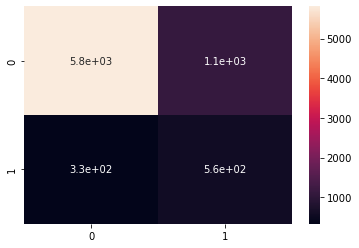

In [71]:
print(cm_heatmap(lr_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Menghitung koefisien model logistic regression**

In [72]:
print(lr_clf_sm.intercept_, lr_clf_sm.coef_)

[-0.44860266] [[-5.42026233e-02 -1.98994016e-01 -5.12586288e-02 -2.66246309e+00
   1.40052914e+00  1.61849617e-01  4.97116729e-01  5.72930639e-01
  -4.60504719e-03  1.43326658e-02  1.61436498e-02 -3.50523906e-02
  -3.60261442e-02  8.30503418e-02 -1.69726348e-02 -3.86538448e-02
   2.71931322e-02  8.56700231e-03 -9.61651502e-03 -2.57912020e-02
  -1.21740097e-02 -3.17321958e-02 -2.89225924e-03  1.72428647e-02
  -4.59874720e-02  8.01076087e-02  2.43533141e-01 -2.43533141e-01
   1.28814697e-02  2.62855902e-01  4.63866005e-02  8.05793048e-02
  -2.14513242e-01  2.00830904e-01 -1.14191091e-01 -1.14450174e-01
   2.68418231e-02  4.52153325e-02  5.18054121e-04 -6.83384886e-02
   9.86650519e-03 -5.16024393e-03  6.45438545e-02 -1.38596592e-01
  -8.45594838e-03  2.47561338e-01  2.46027830e-02 -3.25368746e-02
  -7.95586983e-02]]


**Merangkum hasil akurasi uji test**

In [73]:
ts_lr_sm = (accuracy_score(y_test, lr_clf_sm.predict(X_test))*100).round(2)

df_results.insert(2, 'Testing Accuracy (SMOTE) %', ts_lr_sm)
df_results

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.6


## K-Nearest Neighbour

### Default

**Melihat Classification Report (KNeighborsClassifier)**

In [74]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.74%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.920402     0.710062  0.907431      0.815232      0.895481
recall         0.979716     0.369600  0.907431      0.674658      0.907431
f1-score       0.949133     0.486151  0.907431      0.717642      0.894280
support    27559.000000  3704.000000  0.907431  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[27000   559]
 [ 2335  1369]]

Test Result:
Accuracy Score: 89.05%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912464    0.538126  0.890481     0.725295      0.869791
recall        0.969386    0.277217  0.890481     0.623301      0.890481
f1-score      0.940064    0.365926  0.890481     0.652995      0.874614
support    6925.000000

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


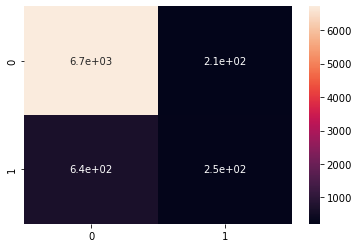

In [75]:
print(cm_heatmap(knn_clf, X_train, y_train, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [76]:
ts_knn = (accuracy_score(y_test, knn_clf.predict(X_test))*100).round(2)
ts_knn

89.05

### SMOTE

**Melihat Classification Report (KNeighborsClassifier - SMOTE)**

In [77]:
knn_clf_sm = KNeighborsClassifier()
knn_clf_sm.fit(X_train_smote, y_train_smote)

print_score(knn_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(knn_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.978048      0.865175  0.914057      0.921612      0.921612
recall         0.847128      0.980986  0.914057      0.914057      0.914057
f1-score       0.907892      0.919448  0.914057      0.913670      0.913670
support    27559.000000  27559.000000  0.914057  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[23346  4213]
 [  524 27035]]

Test Result:
Accuracy Score: 76.36%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.936393    0.260630  0.763562     0.598512      0.859358
recall        0.786570    0.584736  0.763562     0.685653      0.763562
f1-score      0.854968    0.360554  0.763562     0.607761      0.798606
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


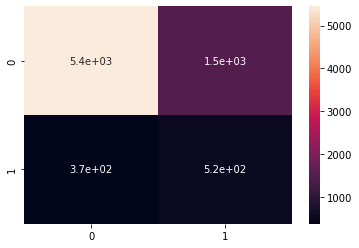

In [78]:
print(cm_heatmap(knn_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [79]:
ts_knn_sm = (accuracy_score(y_test, knn_clf_sm.predict(X_test))*100).round(2)
ts_knn_sm

76.36

**Merangkum hasil akurasi uji test**

In [80]:
ts_knn_row = {'Model':'K-Nearest Neighbors', 'Testing Accuracy %':ts_knn, 'Testing Accuracy (SMOTE) %': ts_knn_sm}

#append row to the dataframe
df_results = df_results.append(ts_knn_row, ignore_index=True)
df_results 

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.60
1,K-Nearest Neighbors,89.05,76.36


## Support Vector Machine 

### Default

**Melihat Classification Report (SVC)**

In [81]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.62%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.912441     0.773598  0.906183      0.843019      0.895991
recall         0.988425     0.294276  0.906183      0.641351      0.906183
f1-score       0.948914     0.426364  0.906183      0.687639      0.887003
support    27559.000000  3704.000000  0.906183  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[27240   319]
 [ 2614  1090]]

Test Result:
Accuracy Score: 89.84%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.909552    0.646526  0.898414     0.778039      0.879568
recall        0.983105    0.240180  0.898414     0.611642      0.898414
f1-score      0.944899    0.350245  0.898414     0.647572      0.877111
support    6925.000000

**Melihat Confusion Matrisk secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


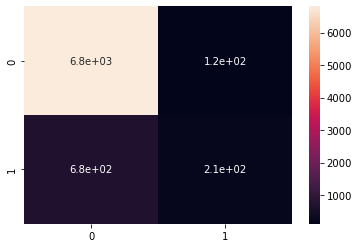

In [82]:
print(cm_heatmap(svm_clf, X_train, y_train, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [83]:
ts_svm = (accuracy_score(y_test, svm_clf.predict(X_test))*100).round(2)
ts_svm

89.84

### SMOTE

**Melihat Classification Report (SVC - SMOTE)**

In [84]:
svm_clf_sm = SVC()
svm_clf_sm.fit(X_train_smote, y_train_smote)

print_score(svm_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(svm_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.812922      0.899938  0.851119      0.856430      0.856430
recall         0.912152      0.790087  0.851119      0.851119      0.851119
f1-score       0.859683      0.841442  0.851119      0.850563      0.850563
support    27559.000000  27559.000000  0.851119  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[25138  2421]
 [ 5785 21774]]

Test Result:
Accuracy Score: 86.18%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.936520    0.415700  0.861822     0.676110      0.877148
recall        0.905415    0.523008  0.861822     0.714212      0.861822
f1-score      0.920705    0.463221  0.861822     0.691963      0.868553
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


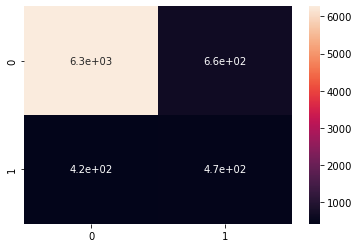

In [85]:
print(cm_heatmap(svm_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [86]:
ts_svm_sm = (accuracy_score(y_test, svm_clf_sm.predict(X_test))*100).round(2)
ts_svm_sm

86.18

**Merangkum hasil akurasi uji test**

In [87]:
ts_svm_row = {'Model':'Support Vector Machine', 'Testing Accuracy %':ts_svm, 'Testing Accuracy (SMOTE) %': ts_svm_sm}

#append row to the dataframe
df_results = df_results.append(ts_svm_row, ignore_index=True)
df_results 

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.60
1,K-Nearest Neighbors,89.05,76.36
2,Support Vector Machine,89.84,86.18


## Decision Tree

### Default

**Melihat Classification Report (DecisionTreeClassifier)**

In [88]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.993153     1.000000  0.993923      0.996576      0.993964
recall         1.000000     0.948704  0.993923      0.974352      0.993923
f1-score       0.996565     0.973677  0.993923      0.985121      0.993853
support    27559.000000  3704.000000  0.993923  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[27559     0]
 [  190  3514]]

Test Result:
Accuracy Score: 84.01%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914900    0.316274  0.840072     0.615587      0.846658
recall        0.903538    0.346801  0.840072     0.625170      0.840072
f1-score      0.909183    0.330835  0.840072     0.620009      0.843253
support    6925.000000

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


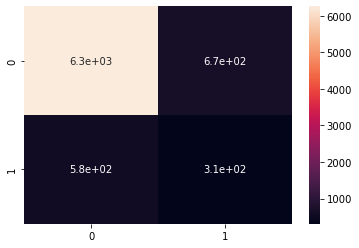

In [89]:
print(cm_heatmap(dt_clf, X_train, y_train, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [90]:
ts_dt = (accuracy_score(y_test, dt_clf.predict(X_test))*100).round(2)
ts_dt

84.01

### SMOTE

**Melihat Classification Report (DecisionTreeClassifier - SMOTE)**

In [91]:
dt_clf_sm = DecisionTreeClassifier()
dt_clf_sm.fit(X_train_smote, y_train_smote)

print_score(dt_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(dt_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.993153      1.000000  0.996553      0.996576      0.996576
recall         1.000000      0.993106  0.996553      0.996553      0.996553
f1-score       0.996565      0.996541  0.996553      0.996553      0.996553
support    27559.000000  27559.000000  0.996553  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[27559     0]
 [  190 27369]]

Test Result:
Accuracy Score: 82.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.913745    0.291391   0.82958     0.602568      0.842798
recall        0.891841    0.345679   0.82958     0.618760      0.829580
f1-score      0.902660    0.316222   0.82958     0.609441      0.835808
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


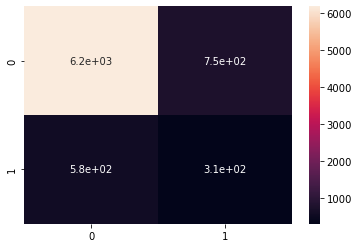

In [92]:
print(cm_heatmap(dt_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [93]:
ts_dt_sm = (accuracy_score(y_test, dt_clf_sm.predict(X_test))*100).round(2)
ts_dt_sm

82.96

**Merangkum hasil akurasi uji test**

In [94]:
ts_dt_row = {'Model':'Decision Tree', 'Testing Accuracy %':ts_dt, 'Testing Accuracy (SMOTE) %': ts_dt_sm}

#append row to the dataframe
df_results = df_results.append(ts_dt_row, ignore_index=True)
df_results 

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.60
1,K-Nearest Neighbors,89.05,76.36
2,Support Vector Machine,89.84,86.18
3,Decision Tree,84.01,82.96


## Random Forest

### Default

**Melihat Classification Report (RandomForestClassifier)**

In [95]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.39%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.994436     0.989685  0.993891      0.992060      0.993873
recall         0.998657     0.958423  0.993891      0.978540      0.993891
f1-score       0.996542     0.973803  0.993891      0.985173      0.993848
support    27559.000000  3704.000000  0.993891  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[27522    37]
 [  154  3550]]

Test Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912783    0.525105  0.889074     0.718944      0.868589
recall        0.967220    0.281706  0.889074     0.624463      0.889074
f1-score      0.939213    0.366691  0.889074     0.652952      0.873948
support    6925.000000

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


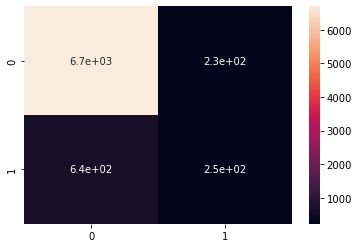

In [96]:
print(cm_heatmap(rf_clf, X_train, y_train, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [97]:
ts_rf = (accuracy_score(y_test, rf_clf.predict(X_test))*100).round(2)
ts_rf

88.91

### SMOTE

**Melihat Classification Report (RandomForestClassifier - SMOTE)**

In [98]:
rf_clf_sm = DecisionTreeClassifier()
rf_clf_sm.fit(X_train_smote, y_train_smote)

print_score(rf_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(rf_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.993153      1.000000  0.996553      0.996576      0.996576
recall         1.000000      0.993106  0.996553      0.996553      0.996553
f1-score       0.996565      0.996541  0.996553      0.996553      0.996553
support    27559.000000  27559.000000  0.996553  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[27559     0]
 [  190 27369]]

Test Result:
Accuracy Score: 83.19%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914463    0.297994  0.831883     0.606229      0.844187
recall        0.893863    0.350168  0.831883     0.622016      0.831883
f1-score      0.904046    0.321981  0.831883     0.613013      0.837692
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


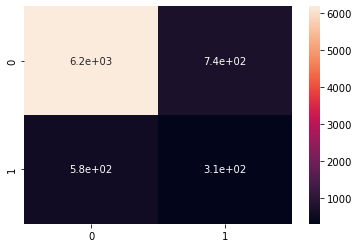

In [99]:
print(cm_heatmap(rf_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [100]:
ts_rf_sm = (accuracy_score(y_test, rf_clf_sm.predict(X_test))*100).round(2)
ts_rf_sm

83.19

**Merangkum hasil akurasi uji test**

In [101]:
ts_rf_row = {'Model':'Random Forest', 'Testing Accuracy %':ts_rf, 'Testing Accuracy (SMOTE) %': ts_rf_sm}

#append row to the dataframe
df_results = df_results.append(ts_rf_row, ignore_index=True)
df_results 

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.60
1,K-Nearest Neighbors,89.05,76.36
2,Support Vector Machine,89.84,86.18
3,Decision Tree,84.01,82.96
4,Random Forest,88.91,83.19


## Naive Bayes

### Default

**Melihat Classification Report (Naive Bayes)**

In [102]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

print_score(gnb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gnb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.926044     0.397582  0.853341      0.661813      0.863433
recall         0.905984     0.461663  0.853341      0.683823      0.853341
f1-score       0.915904     0.427233  0.853341      0.671568      0.858007
support    27559.000000  3704.000000  0.853341  31263.000000  31263.000000
_______________________________________________
Confusion Matrix: 
 [[24968  2591]
 [ 1994  1710]]

Test Result:
Accuracy Score: 85.61%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.928360    0.388145  0.856064     0.658253      0.866778
recall        0.907581    0.455668  0.856064     0.681625      0.856064
f1-score      0.917853    0.419205  0.856064     0.668529      0.861009
support    6925.000000

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


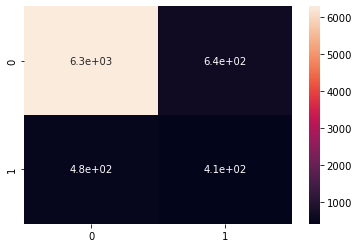

In [103]:
print(cm_heatmap(gnb_clf, X_train, y_train, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [104]:
ts_gnb = (accuracy_score(y_test, gnb_clf.predict(X_test))*100).round(2)
ts_gnb

85.61

### SMOTE

**Melihat Classification Report (Naive Bayes - SMOTE)**

In [105]:
gnb_clf_sm = GaussianNB()
gnb_clf_sm.fit(X_train_smote, y_train_smote)

print_score(gnb_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=True)
print_score(gnb_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False)

Train Result:
Accuracy Score: 70.13%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.651661      0.799385  0.701332      0.725523      0.725523
recall         0.865089      0.537574  0.701332      0.701332      0.701332
f1-score       0.743359      0.642845  0.701332      0.693102      0.693102
support    27559.000000  27559.000000  0.701332  55118.000000  55118.000000
_______________________________________________
Confusion Matrix: 
 [[23841  3718]
 [12744 14815]]

Test Result:
Accuracy Score: 83.09%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.935895    0.344852   0.83086     0.640374      0.868518
recall        0.868592    0.537598   0.83086     0.703095      0.830860
f1-score      0.900989    0.420175   0.83086     0.660582      0.846177
support    6925.0

**Melihat Confusion Matriks secara visual**

Confusion Matrix (Test): 
 AxesSubplot(0.125,0.125;0.62x0.755)

None


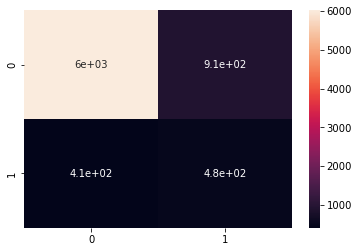

In [106]:
print(cm_heatmap(gnb_clf_sm, X_train_smote, y_train_smote, X_test, y_test, train=False))

**Mendapatkan akurasi uji test**

In [107]:
ts_gnb_sm = (accuracy_score(y_test, gnb_clf_sm.predict(X_test))*100).round(2)
ts_gnb_sm

83.09

# Conclusion (Accuracy Model)

**Merangkum hasil akurasi uji test**

In [108]:
ts_gnb_row = {'Model':'Naive Bayes', 'Testing Accuracy %':ts_gnb, 'Testing Accuracy (SMOTE) %': ts_gnb_sm}

#append row to the dataframe
df_results = df_results.append(ts_gnb_row, ignore_index=True)
df_results 

,Model,Testing Accuracy %,Testing Accuracy (SMOTE) %
0,Logistic Regression,89.82,81.60
1,K-Nearest Neighbors,89.05,76.36
2,Support Vector Machine,89.84,86.18
3,Decision Tree,84.01,82.96
4,Random Forest,88.91,83.19
5,Naive Bayes,85.61,83.09


Dari hasil pengolahan model, baik secara default maupun menggunakan data train SMOTE, didapatkan hasil bahwa model terbaik adalah model **Support Vector Machine**, dengan menggunakan default parameter. Sehingga dapat disimpulkan bahwa jika menggunakan model tersebut, kita bisa memprediksi customer bank akan berlangganan deposito atau tidak, dengan akurasi yang cukup besar.